# Package management
In this section the import and installation of necessary packages are handled. Apart from the already existing packages in the environment the following packages were required.


*   Tenserflow
*   Tenserflow.Keras
*   Numpy
*   Pandas
*   nltk
*   seaborn





In [ ]:
import sys 
print("User Current Version:-", sys.version)

User Current Version:- 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install clean-text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re;
import os;
import tensorflow as tf;
import pandas as pd;
import numpy as np;
import nltk
import seaborn as sns
import langdetect
from cleantext import clean
from langdetect import detect_langs
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding # Biderectional layer is modifier on top of the LSTM layer , dropout - regulerization
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords


In [ ]:
!pip list
# listing down all the package versions that are imported so that no dependency problem occours

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

# Data management
In this section the logic necessary to importing data and exploratory analysis is hanndled 

In [ ]:
CSV_PATH = os.path.join('sample_data','train.csv') # providing the path to the import csv wrt the notebook

In [ ]:
data = pd.read_csv(CSV_PATH,encoding='utf-8') #importing csv using pandas

In [ ]:
data.info() #overall summary of the data in the corpus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
data.describe()
data.describe().iloc[0]

toxic            159571.0
severe_toxic     159571.0
obscene          159571.0
threat           159571.0
insult           159571.0
identity_hate    159571.0
Name: count, dtype: float64

In [ ]:
data.shape

(159571, 8)

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
data.columns # all the columns in the dataset

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [ ]:
data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [ ]:
data.sample(20)['comment_text'] # sampling 20 random comments to see the Information 

56779     "\n\nOrphaned fair use image (Image:One Piece ...
147798    Blank page? \n\nI'm using it to test my eastim...
125434    "\nWikipedia needs you to stop repeatedly fuck...
38883     My apologies for what may have been misinterpr...
19129     Image request\n Hi and thank you for your requ...
6950      I disagree that vowel harmony is the place to ...
110521    "\n\nI have understood that what I did was ina...
149470         Great, I'm glad we managed to work this out.
145515    Your link is to a graph cited to a university ...
140101    "\n\n the never ending edit... \n\nOf the hund...
88371     The content is from a published secondary sour...
123544    You're just harassing me and beign a troll. Go...
123615    Hey Kimchi,\nthats not advertising. It's our a...
83448     I promised not removing anything else about me...
25486     Place\nSomebody know where is Aguz (Souira Gue...
7290      "\n\n Replaceable fair use Image:Osfpchamps.jp...
124183    Indeed there is no such rule a

In [ ]:
#detecting which language the dataset is from
data['comment_text'].sample(20)
for a,b in data['comment_text'].sample(20).items():
    print(detect_langs(b))

[en:0.9999961555741781]
[en:0.9999983485902598]
[en:0.9999947229177771]
[en:0.9999941376725725]
[en:0.9999967493981976]
[en:0.9999964343152216]
[en:0.9999947845891339]
[en:0.999997945211912]
[en:0.9999963198825534]
[en:0.9999965053460667]
[sv:0.7140430672637392, sw:0.28571265736814516]
[en:0.9999962874026997]
[en:0.9999988146971488]
[en:0.9999977980942807]
[en:0.9999969484231324]
[en:0.999997850701926]
[en:0.9999957788060664]
[en:0.9999979231904401]
[en:0.9999968398776752]
[en:0.9999975017847259]


In [ ]:
data['comment_text'][0] #comment of the first entry

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
data['comment_text'][1] #Going through the entries to see the types of information in the comment

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [ ]:
data['comment_text'][2] #Going through the entries to see the types of information in the comment

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [ ]:
data[data.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
data[data.columns[2:]].iloc[6] #toxicity numbers of an entry with a toxic comment

toxic            1
severe_toxic     1
obscene          1
threat           0
insult           1
identity_hate    0
Name: 6, dtype: int64

In [ ]:
data.iloc[6]

id                                           0002bcb3da6cb337
comment_text     COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
toxic                                                       1
severe_toxic                                                1
obscene                                                     1
threat                                                      0
insult                                                      1
identity_hate                                               0
Name: 6, dtype: object

In [ ]:
data[data.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [ ]:
data[data.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
data.loc[data['toxic'] == 1]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


In [ ]:
print('No of toxic entries:',data.loc[data['toxic'] == 1].sum()[2])
print('No of severe_toxic entries:',data.loc[data['severe_toxic'] == 1].sum()[3])
print('No of obscene entries:',data.loc[data['obscene'] == 1].sum()[4])
print('No of threat entries:',data.loc[data['threat'] == 1].sum()[5])
print('No of insult entries:',data.loc[data['insult'] == 1].sum()[6])
print('No of identity_hate entries:',data.loc[data['identity_hate'] == 1].sum()[7])



No of toxic entries: 15294
No of severe_toxic entries: 1595
No of obscene entries: 8449
No of threat entries: 478
No of insult entries: 7877
No of identity_hate entries: 1405


In [ ]:
df_cpy = data.copy()
df_cpy['toxic'] = df_cpy['toxic'].astype('float32') 
df_cpy['severe_toxic'] = df_cpy['severe_toxic'].astype('float32') 
df_cpy['obscene'] = df_cpy['obscene'].astype('float32') 
df_cpy['threat'] = df_cpy['threat'].astype('float32') 
df_cpy['insult'] = df_cpy['insult'].astype('float32') 
df_cpy['identity_hate'] = df_cpy['identity_hate'].astype('float32') 
df_cpy = df_cpy[df_cpy.columns[2:]]

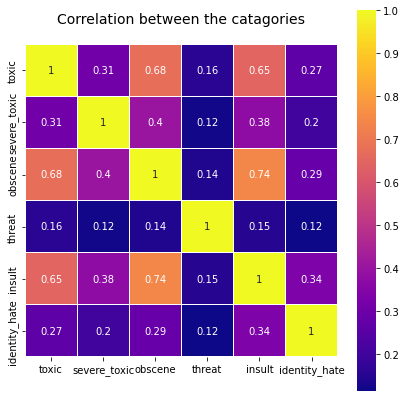

In [ ]:
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation between the catagories',y=1.05,size=14)
sns.heatmap(df_cpy.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True) # heat map of how each catagory correlates to one another

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_cpy2 = data.copy()
df_cpy2 = df_cpy2[['comment_text']] 
df_cpy2['Number of characters'] = df_cpy2['comment_text'].apply(lambda x:len(x))
df_cpy2['Number of distinct characters'] = df_cpy2['comment_text'].apply(lambda x:len(set(x)))
#removing numbers puncuations
df_cpy2['cleaned'] = df_cpy2['comment_text'].apply(lambda x:re.sub('[^A-Za-z]',' ' ,x))
#lowercasing
df_cpy2['lower'] = df_cpy2['cleaned'].apply(lambda x:x.lower())
#removing punctuations
df_cpy2['rem_punkt'] = df_cpy2['lower'].apply(lambda x: clean(x, no_punct=True))
df_cpy2['tokenized'] = df_cpy2['rem_punkt'].apply(lambda x: word_tokenize(x))
df_cpy2['stop words removed'] = df_cpy2['tokenized'].apply(lambda t: [x for x in t if x not in stopwords .words ('english')])
df_cpy2['lexical richness'] = df_cpy2['tokenized'].apply(lambda x:(len(set(x)) / (len(x)+1) ))



In [ ]:
df_cpy2

In [ ]:
words = df_cpy2['tokenized']
allwords = []
for wordlist in words:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

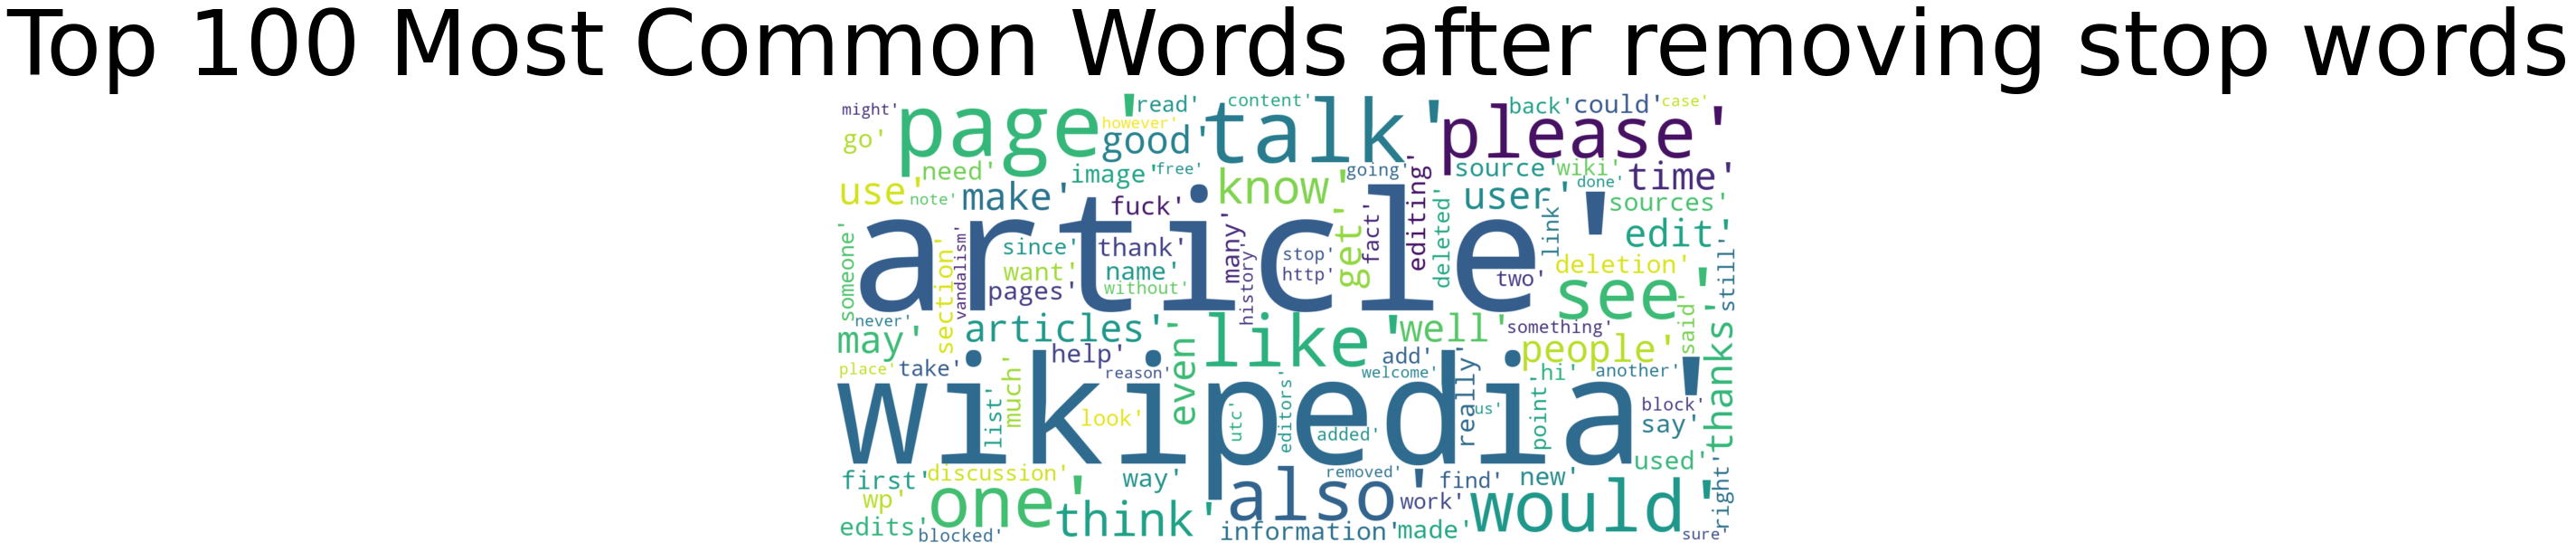

In [ ]:
words_strm = df_cpy2['stop words removed']
allwords_strm = []
for wordlist in words_strm:
    allwords_strm += wordlist

mostcommon_strm = FreqDist(allwords_strm).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon_strm))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words after removing stop words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

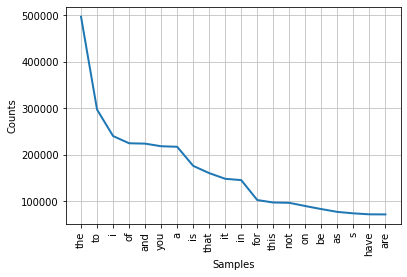

In [ ]:
mostcommon = FreqDist(allwords)
mostcommon.plot(20)

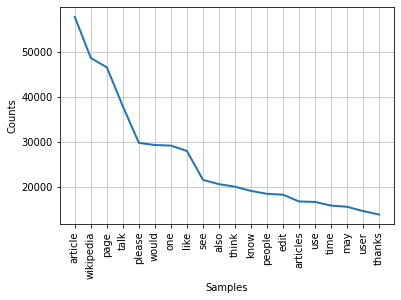

In [ ]:
mostcommon = FreqDist(allwords_strm)
mostcommon.plot(20)

In [ ]:
print(FreqDist(allwords).most_common(20))
print(FreqDist(allwords_strm).most_common(20))

[('the', 497217), ('to', 297521), ('i', 240628), ('of', 225084), ('and', 224302), ('you', 218701), ('a', 217527), ('is', 176503), ('that', 160879), ('it', 148666), ('in', 145811), ('for', 102990), ('this', 97679), ('not', 96999), ('on', 90047), ('be', 83516), ('as', 77479), ('s', 74363), ('have', 72246), ('are', 72056)]
[('article', 57738), ('wikipedia', 48625), ('page', 46542), ('talk', 37908), ('please', 29802), ('would', 29323), ('one', 29199), ('like', 28008), ('see', 21606), ('also', 20643), ('think', 20084), ('know', 19148), ('people', 18499), ('edit', 18311), ('articles', 16809), ('use', 16709), ('time', 15898), ('may', 15629), ('user', 14677), ('thanks', 13912)]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


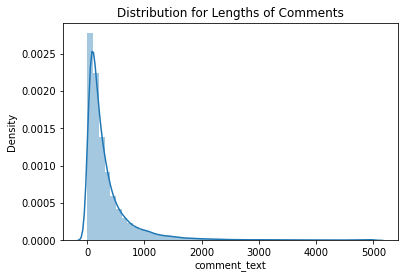

In [ ]:
lens = df_cpy2.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()

In [ ]:
df_cpy2.to_csv('./sample_data/preprocessed_train.csv')

# Data Preperation
In this section the logic pertainig to the preperation of the dataset is handled.In this section the following tasks will be performed


*   Looking for duplicated entries and removing if they are present
*   Looking for entries with null values and if present manually catagorize the entries if the number of entries with null entries are small.
*   Removing all punctuations and numbers
*   Lowercasing the words since the lowercase and uppercase words doesnt hold any value in detecting toxicity
*   From the above graph it can be observed that the heightest frequency of the words that are occouring are stop words . Since they does not hold any value to the context of our problem, we will remove them
*   Lematizing the words to their roots since we can derive the meaning from them yet with lesser number of values to encode
*   And finally creating a singular string to be processed.



In [ ]:
data.duplicated().sum() #duplicated entries

0

In [ ]:
#removing duplicates if there were any
data.drop_duplicates(keep='first',inplace=True)

In [ ]:
data.isna() # gives all columns where something is missing , true if something is missing

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159566,False,False,False,False,False,False,False,False
159567,False,False,False,False,False,False,False,False
159568,False,False,False,False,False,False,False,False
159569,False,False,False,False,False,False,False,False


In [ ]:
#Handling missing values
data.isna().sum().sort_values(ascending=False)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
#rephrasing common terms
#removing contractions

contraction_list = {
    ' will':['\'ll'],
    ' have':['\'ve'],
    ' do not':['don\'t','dont'],
    ' are not':['aren\'t'],
    ' will not':['won\'t','wont'],
    ' cannot':['can\'t','cant'],
    ' shall not':['shan\'t','shant'],
    ' am':['\'m'],
    "does not":["doesn't","doesnt"],
    "did not":["didn't","didnt"],
    "has not":["hasn't","hasnt"],
    "have not":["haven't","havent"],
    "would not":["wouldn't"],
    "did not":["didn't","didnt"],
    "it is":["it's"],
    "that is":["that's"],
    "were not":["weren't","werent"],
    ' you ':['u','U']
}

def process_text(text):
        for target, patterns in contraction_list.items():
            for pat in patterns:
                text = re.sub(pat, target, text)
                return text


In [ ]:
data['comment_text'] = data['comment_text'].apply(lambda x: process_text(x) )


In [ ]:
#removing numbers puncuations
data['cleaned'] = data['comment_text'].apply(lambda x:re.sub('[^A-Za-z]',' ' ,x))
#lowercasing
data['lower'] = data['cleaned'].apply(lambda x:x.lower())
#removing punctuations
data['rem_punkt'] = data['lower'].apply(lambda x: clean(x, no_punct=True))
#tokenizing
data['tokenized'] = data['rem_punkt'].apply(lambda x: word_tokenize(x))
#removing stop words
data['stop words removed'] = data['tokenized'].apply(lambda t: [x for x in t if x not in stopwords .words ('english')])


In [ ]:
data["final_data"] = data["stop words removed"].apply(lambda x: " ".join(x))
data


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned,lower,rem_punkt,tokenized,stop words removed,final_data
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,explanation why the edits made under my userna...,explanation why the edits made under my userna...,"[explanation, why, the, edits, made, under, my...","[explanation, edits, made, username, hardcore,...",explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,d aww he matches this background colour i m s...,d aww he matches this background colour i m se...,"[d, aww, he, matches, this, background, colour...","[aww, matches, background, colour, seemingly, ...",aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,hey man i m really not trying to edit war it...,hey man i m really not trying to edit war it s...,"[hey, man, i, m, really, not, trying, to, edit...","[hey, man, really, trying, edit, war, guy, con...",hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,more i can t make any real suggestions on im...,more i can t make any real suggestions on impr...,"[more, i, can, t, make, any, real, suggestions...","[make, real, suggestions, improvement, wondere...",make real suggestions improvement wondered sec...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,you sir are my hero any chance you remember...,you sir are my hero any chance you remember wh...,"[you, sir, are, my, hero, any, chance, you, re...","[sir, hero, chance, remember, page]",sir hero chance remember page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,And for the second time of asking when ...,and for the second time of asking when ...,and for the second time of asking when your vi...,"[and, for, the, second, time, of, asking, when...","[second, time, asking, view, completely, contr...",second time asking view completely contradicts...
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,You should be ashamed of yourself That is a ...,you should be ashamed of yourself that is a ...,you should be ashamed of yourself that is a ho...,"[you, should, be, ashamed, of, yourself, that,...","[ashamed, horrible, thing, put, talk, page]",ashamed horrible thing put talk page
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,Spitzer Umm theres no actual article for pr...,spitzer umm theres no actual article for pr...,spitzer umm theres no actual article for prost...,"[spitzer, umm, theres, no, actual, article, fo...","[spitzer, umm, theres, actual, article, prosti...",spitzer umm theres actual article prostitution...
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,And it looks like it was actually you who put ...,and it looks like it was actually you who put ...,and it looks like it was actually you who put ...,"[and, it, looks, like, it, was, actually, you,...","[looks, like, actually, put, speedy, first, ve...",looks like actually put speedy first version d...


In [ ]:
data.to_csv('sample_data/train_new')

# Text Vectorization

In [ ]:
MAX_WORDS = 200000 #no of words in the vocabulory

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode='int');


In [ ]:
X = data['final_data']
y = data[data.columns[2:8]].values


In [ ]:
vectorizer.adapt(X.values)

In [ ]:
X.values

array(['explanation edits made username hardcore metallica fan reverted vandalisms closure gas voted new york dolls fac please remove template talk page since retired',
       'aww matches background colour seemingly stuck thanks talk january utc',
       'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info',
       ...,
       'spitzer umm theres actual article prostitution ring crunch captain',
       'looks like actually put speedy first version deleted look',
       'really think understand came idea bad right away kind community goes bad ideas go away instead helping rewrite'],
      dtype=object)

In [ ]:
vectorizer("Hello, This is a test text")[:6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([189,   1,   1,   1, 566, 161])>

In [ ]:
vectorized_text = vectorizer(X.values) #passing the numpy array to the vectorizer and vectorizing all text

In [ ]:
vectorized_text # 159571 - no of entries in the dataset , #1800 - output seq length wich is the max num of words a sentence might have. 0 s are given if it does to have that many words

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  644,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2488, ...,     0,     0,     0],
       [  424,   440,    70, ...,     0,     0,     0],
       ...,
       [32440,  7389,   382, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
vocab = vectorizer.get_vocabulary()
#print(*vocab, sep = ", ")

In [ ]:
#Creating a data pipeline in tf. when we have data that cannot fit into memory
#MCSHABAP -data pipeline generation steps, map, cache,shuffle,batch,prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))

In [ ]:
dataset = dataset.cache()

In [ ]:
dataset = dataset.shuffle(160000) #160000 - buffersize

In [ ]:
dataset = dataset.batch(16) #each batch has 16 samples

In [ ]:
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
batch_x,batch_y = dataset.as_numpy_iterator().next() #text in the vectorized format and the labels

In [ ]:
batch_x

array([[   440,      0,      0, ...,      0,      0,      0],
       [   147,     30,    203, ...,      0,      0,      0],
       [  2296,   3490,   1550, ...,      0,      0,      0],
       ...,
       [     7,   1910,     58, ...,      0,      0,      0],
       [  4190,  34786, 136603, ...,      0,      0,      0],
       [   533,    285,    238, ...,      0,      0,      0]])

In [ ]:
batch_x.shape #batch size is 16

(16, 1800)

In [ ]:
trainDataset = dataset.take(int(len(dataset)*.7)) # length of the 70% of data converted to int and taken from the dataset
validationDataset = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # validation partition skiping the first 70%
testDataset = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [ ]:
#Bidirectional??

In [ ]:
model = Sequential()
# Create the embedding layer 
#1 embedding per word and each embedding has 32 values
model.add(Embedding(MAX_WORDS+1, 32)) # The embedding has the max number of words +1 , +1 for the unknown words. and each embedding is 32 values in length
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh'))) # this allows to pass information backwards and fowards accross the lstm. This is extremely important in text processing since the words prior to a particular word might have a meaning in the context of the word
#Ex: I don't hate you. if the sentence is taken word by word since hate is there it might be classified as toxic. But because of the don't modifier the values are changed
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
# The ultimate layer maps to the number of outputs in our y values
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
history = model.fit(trainDataset, epochs=2, validation_data=validationDataset)

Epoch 1/2
  72/6981 [..............................] - ETA: 2:36:17 - loss: 0.2238

KeyboardInterrupt: ignored

In [ ]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'cleaned', 'lower', 'rem_punkt', 'tokenized',
       'stop words removed', 'final_data'],
      dtype='object')

In [ ]:
print('Enter the comment:')
text = input()
Input_comment = vectorizer(text)
print(Input_comment)
resIn = model.predict(np.expand_dims(Input_comment,0))
print(resIn)

Enter the comment:


 You suck


tf.Tensor([  7 397   0 ...   0   0   0], shape=(1800,), dtype=int64)
1/1 [==============================] - 0s 75ms/step
[[0.9745923  0.16044368 0.8949834  0.03380769 0.7252065  0.1112239 ]]


In [ ]:
test_batch_X , test_batch_y = testDataset.as_numpy_iterator().next()

In [ ]:
(model.predict(test_batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 158ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
test_batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
for batch in testDataset.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch;
    # Make a prediction 
    yhat = model.predict(X_true);
    
    # Flatten the predictions
    y_true = y_true.flatten();
    yhat = yhat.flatten();
    
    pre.update_state(y_true, yhat);
    re.update_state(y_true, yhat);
    acc.update_state(y_true, yhat);


1/1 [==============================] - 0s 139ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8269484639167786, Recall:0.6993436813354492, Accuracy:0.46690070629119873


In [ ]:
model.save('toxicityDetector.h5')